# Data Preparation
### Training a Neural Network to identify the best M3 Combo
By Zach Shelton
5/13/21


In [1]:
#NanoAOD HackSchema
#Solution from Danny Noonan

In [2]:
from __future__ import print_function, division
import uproot
import numpy as np
from coffea.nanoevents import NanoAODSchema,NanoEventsFactory
import coffea
from uproot3_methods import TLorentzVectorArray
import uproot3_methods
import numpy as np
import coffea.hist as hist
import matplotlib.pyplot as plt
import awkward as ak
class HackSchema(NanoAODSchema):
    def __init__(self, base_form):
        base_form["contents"].pop("Muon_fsrPhotonIdx", None)
        base_form["contents"].pop("Electron_photonIdx", None)
        super().__init__(base_form)
files ="W4jets_2016_skim.root"
import coffea.processor as processor
from pprint import pprint
file=uproot.open(files)
from pprint import pprint

In [3]:
#Now lets redo with the cuts detailed by CMS Draft Analysis
#https://drive.google.com/file/d/1XEOLyZ-Q1HdEQY379RpyyQkOF1Q8KlsL/view
events = NanoEventsFactory.from_root(files,schemaclass=HackSchema,entry_stop=1000).events()

C:\Users\zshel\anaconda3\envs\py38\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
C:\Users\zshel\anaconda3\envs\py38\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
C:\Users\zshel\anaconda3\envs\py38\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
C:\Users\zshel\anaconda3\envs\py38\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  warnings.warn(
C:\Users\zshel\anaconda3\envs\py38\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
C:\Users\zshel\anaconda3\envs\py38\lib\site-pa

In [4]:
#Condensing_all Lepton_cuts
jets=events.Jet
jetSel = (jets.pt>30) & (abs(jets.eta)<2.4)
tightJet = jets[jetSel]
bJet = tightJet[tightJet.btagDeepFlavB > 0.642]
muons = events.Muon
muonSel = (muons.pt>30) & (abs(muons.eta)<2.4)
tightMuon = muons[muonSel]
ele = events.Electron
eleSel = (ele.pt>35)&(abs(ele.eta)<2.4)
tightEle = ele[eleSel]
eventSel = (((ak.num(tightMuon)==1) | (ak.num(tightEle)==1)) &
            (ak.num(tightJet)>= 3) & (ak.num(bJet)>=1)
           )
final = events[eventSel]

In [5]:
#G = Global index of particles - Artifact from Coffea/NanoAOD Tools
print(len(final))

33


In [8]:
tightJet.genJetIdx[2]
print(events.GenPart)

[[GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle, GenParticle]]


In [10]:
tDecay = tDecay[tDecay.hasFlags('isLastCopy')]
t_Events=tDecay[abs(tDecay.pdgId)==5]
W = tDecay[abs(tDecay.pdgId)==24]
W = W[W.hasFlags('isLastCopy')]
WDecay = W.distinctChildren
WDecay = WDecay[WDecay.hasFlags('isLastCopy')]
#t_events is the lone bottom, W_events is the -> two jets
W_Events=ak.flatten(WDecay[ak.all(abs(WDecay.pdgId)<=8,axis=-1)],axis=3)
#select the hadronically decaying W
hadW = ak.num(W_Events,axis=2)==2
#select b quarks associated with hadronically decaying W
hadB = t_Events[hadW]
hadB = ak.flatten(hadB,axis=2)
W_quarks = W_Events[hadW]
W_quarks = ak.flatten(W_quarks,axis=2)
qqb = ak.concatenate([hadB,W_quarks],axis=1)
#To start lets filter for only 1 HadronicW
#Filter out qqb events that have mare than 4 jets
mask=ak.count(qqb.pdgId,axis=1)<4
qqb = qqb[ak.count(qqb.pdgId,axis=1)<4]
print(qqb)

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]


In [609]:
from matplotlib import pyplot as plt 

In [11]:
eventcombs= ak.combinations(final.Jet,3,axis=1)

In [12]:
reco=eventcombs['0']+eventcombs['1']+eventcombs['2']

In [13]:
ak.flatten(reco.mass)

<Array [1.19e+03, 933, 902, ... 817, 368, 212] type='3061 * float32'>

In [752]:
jetcombos=ak.flatten(combs)
genpart_vals=ak.combinations(qqb,3)
good_vals=jetcombos[trutharray]
bad_vals=jetcombos[np.invert(trutharray)]
genreco=genpart_vals['0']+genpart_vals['1']+genpart_vals['2']

In [588]:
print(len(events.Jet[events.Jet.bt]))

In [16]:
bins1=[]
n=0
while n*5<=500:
    bins1.append(n*10)
    n+=1

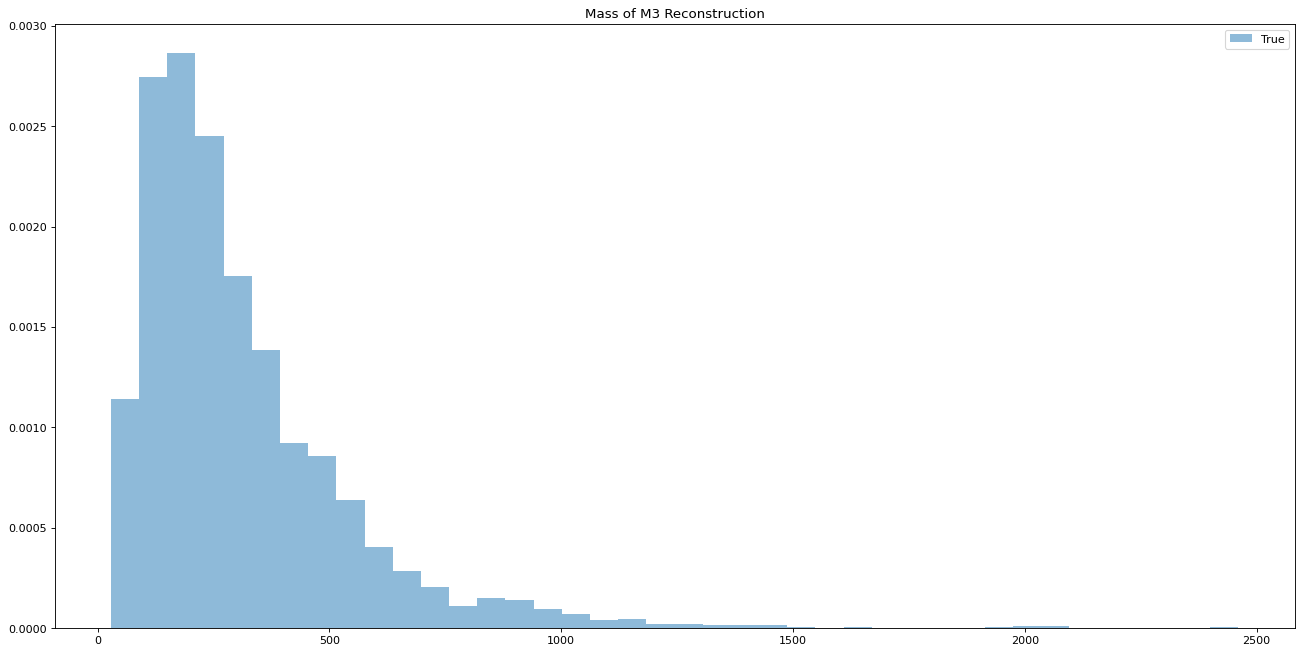

In [15]:
plt.figure(figsize=(20,10),dpi=80)
plt.hist(ak.flatten(reco.mass),alpha=.5,density=True,bins=40)
plt.legend(["True","False"])
plt.title("Mass of M3 Reconstruction")
plt.show()

In [720]:
len(ak.flatten(matchedjets))
print(ak.flatten(len()))

7816

In [756]:
bins1=[]
n=0
while n*5<=500:
    bins1.append(n*10)
    n+=1

In [589]:
genjetmatches.fields

['childrenIdxG',
 'distinctChildrenIdxG',
 'distinctParentIdxG',
 'eta',
 'genPartIdxMother',
 'genPartIdxMotherG',
 'mass',
 'pdgId',
 'phi',
 'pt',
 'status',
 'statusFlags']

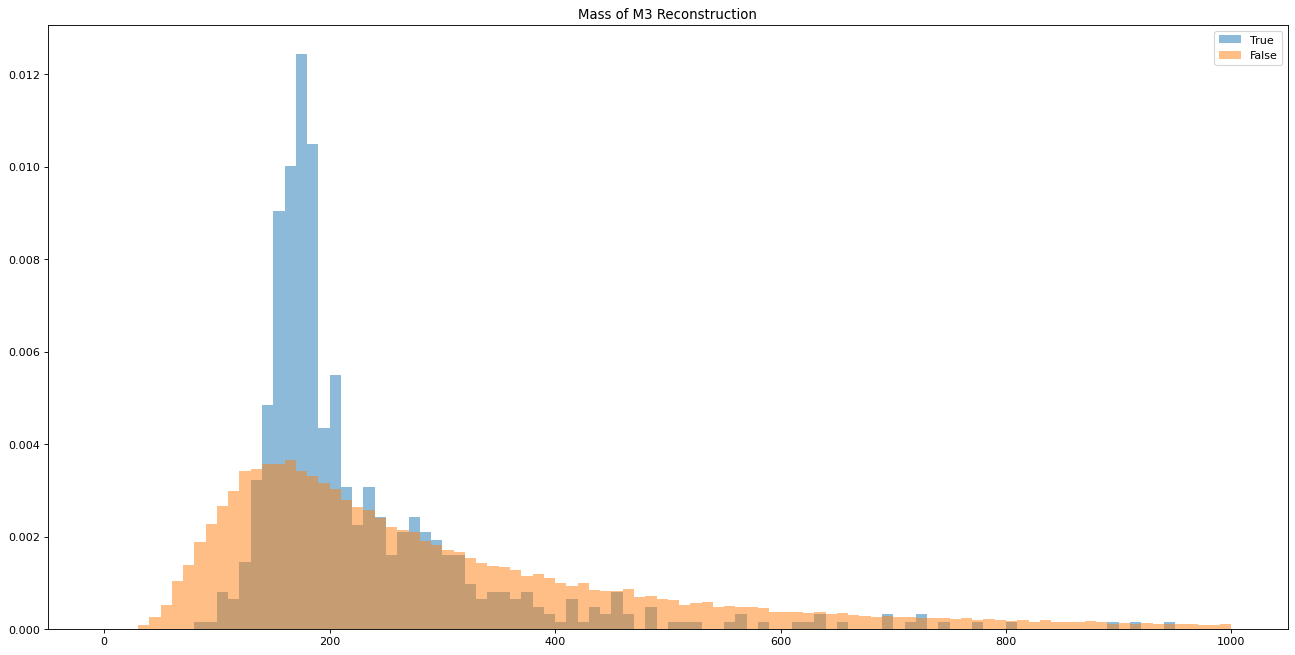

<Figure size 432x288 with 0 Axes>

In [757]:
plt.figure(figsize=(20,10),dpi=80)
greco=good_vals['0']+good_vals['1']+good_vals['2']
breco=bad_vals['0']+bad_vals['1']+bad_vals['2']
plt.hist(greco.mass,alpha=.5,density=True,bins=bins1)
plt.hist(breco.mass,alpha=.5,density=True,bins=bins1)
plt.legend(["True","False"])
plt.title("Mass of M3 Reconstruction")
plt.show()
plt.savefig("Mass.png")

In [730]:
#We create combinations from TightJet
combs=ak0.combinations(events.Jet,3,replacement=False)
argcombs=ak.argcombinations(events.Jet,3,replacement=False)
#match GenJets to nearest GenPart
genjetmatches = events.GenJet.nearest(events.GenJet)
#match TightJet to nearest correct GenJet
matchedjets=genjetmatches.nearest(events.Jet)
#In order to accomodate the nearest ccombination specific arrangement, using replacement create EVERY permutation of jets
#byfilling match jets with identical dummyjet, since every combo is unique. it will always be false.
matchjetsfilled=ak.fill_none(ak.pad_none(matchjets,3),dummyjet)

AttributeError: module 'awkward0' has no attribute 'permutations'

In [718]:
np.mean(greco.mass)

219.8357835591133

In [722]:
print(matchedjets[0].pt)
print(genjetmatches[0].pt)

[123, 87.9, 44.4, 36.2, 31.9]
[133, 83.2, 39.7, 32.1, 32.1]


In [750]:
print()
test=matchjetsfilled.genJetIdx
t1=(combs['0'].genJetIdx==test[:,0])|(combs['0'].genJetIdx==test[:,1])|(combs['0'].genJetIdx==test[:,2])
t2=(combs['1'].genJetIdx==test[:,0])|(combs['1'].genJetIdx==test[:,1])|(combs['1'].genJetIdx==test[:,2])
t3=(combs['2'].genJetIdx==test[:,0])|(combs['2'].genJetIdx==test[:,1])|(combs['2'].genJetIdx==test[:,2])
t=t1&t2&t3
combs['0'].genJetIdx
trutharray=ak.flatten(t)
print(trutharray)


[False, False, False, False, False, True, ... False, False, False, False, False]


In [751]:
print(combs['0'].genJetIdx[0])
print(t[0])
print(combs['0'].genJetIdx[0]==test[:,0][0])

[0, 0, 0, 0, 0, 0, 1, 1, 1, 2]
[False, False, False, False, False, True, False, False, False, False]
[True, True, True, True, True, True, False, False, False, False]


In [697]:
combs['0'].genJetIdx[0]==test[:,0][0]

<Array [True, True, True, ... False, False] type='10 * bool'>

In [759]:
from pprint import pprint
print(t1[0])
print(t2[0])
print(t3[0])
print(t[0])

[True, True, True, True, True, True, False, False, False, False]
[False, False, False, False, False, True, False, False, True, True]
[False, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, True, False, False, False, False]


In [607]:
#Finds the arguments of the matching jet in an event
def equal(j1,j2):
    #created this to utilize jit and to avoid any unitended errors, 
    #these are the nearest function values and should be obtainable
    return (j1.pt==j2.pt)&(j1.eta==j2.eta)&(j1.phi==j2.phi)&(j1.mass==j2.mass)&(j1.area==j2.area)
print(equal(events.Jet[0][0],events.Jet[0][0]))

True


In [678]:
jetcombos[0]['0']

Jet

## Dataset Parameters:
* 4-Vector
* Area
* Delta-r 1-2
* Delta-r 2-3
* Delta-r 1-3
* B-tag

In [760]:
j1,j2,j3=ak.unzip(jetcombos)
dR1_2=j1.delta_r(j2)
dR1_3=j1.delta_r(j3)
dR2_3=j2.delta_r(j3)
j1b_tag=j1.btagCSVV2
j2b_tag=j1.btagCSVV2
j3b_tag=j1.btagCSVV2
j1area=j1.area
j2area=j2.area
j3area=j3.area
j1p4=ak.zip({"pt":j1.pt,"phi":j1.phi,"eta":j1.eta,"mass":j1.mass},with_name="PtEtaPhiMLorentzVector")
j2p4=ak.zip({"pt":j2.pt,"phi":j2.phi,"eta":j2.eta,"mass":j2.mass},with_name="PtEtaPhiMLorentzVector")
j3p4=ak.zip({"pt":j3.pt,"phi":j3.phi,"eta":j3.eta,"mass":j2.mass},with_name="PtEtaPhiMLorentzVector")
processedMLdata=ak.zip({"j1p4":j1p4,"j2p4":j2p4,"j3p4":j3p4,
                        "dR12":dR1_2,"dR13":dR1_3,"dR23":dR2_3,
                       "j1btag":j1b_tag,"j2btag":j2b_tag,"j3btag":j3b_tag,
                       "j1area":j1area,"j2area":j2area,"j3area":j3area})

In [761]:
df=ak.to_pandas(processedMLdata)
df.to_csv("data/ML_data.csv",index=False)
vf=ak.to_pandas(trutharray)
vf.to_csv("data/Valid_data.csv",index=False)

In [81]:
import keras
import tensorflow as tf
import pandas as pd

______________________________________________________________________________
# Running Notes and questions
- Losing Data because of arbitrary 8 jet cut?

## Notes for Zach to keep up

create JIT compiler

Seperate values, weights and triggers(X)
read these into tensors for Keras(X)
Best ML Algorithm?
- Deep Neural Net
- Iterative Boosted Tree
    - They are fast
    - External ML algorithm modifies BDT parameters
Should I use Keras or PyTorch

# Sources/Further Reading:

CMS Draft Analysis Note(FIT, AAS, Wayne State, NISTR): https://drive.google.com/file/d/1XEOLyZ-Q1HdEQY379RpyyQkOF1Q8KlsL/view

Invariant Mass Wikipedia Article: https://en.wikipedia.org/wiki/Invariant_mass

Measurement of the semileptonic tt + γ production cross-section in pp collisions at √s = 8 Tev: https://arxiv.org/pdf/1706.08128.pdf

Coffea Documentation: https://coffeateam.github.io/coffea/

Awkward Array Documentation: https://awkward-array.readthedocs.io/en/latest/

AOD DATA GUIDE: https://twiki.cern.ch/twiki/bin/view/CMSPublic/SWGuideAodDataTable